# Supervised Machine Learning: Regression
#
# This script contains:
# 1. Importing libraries and data
# 2. Data cleaning
# 3. Data prep for regression analysis
# 4.Regression analysis

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# import the cvs file
path = r'/Users/fatemehshahvirdi/Work-Related/Data Analysis/Data Immersion/Achievement 6/Rome & Sydney Analysis/O2 Data'
df_rome_june = pd.read_csv(os.path.join(path, 'Prepared', 'rome_listings_june_cleaned-2.csv'), index_col=False)

# 2. Data cleaning

In [4]:
df_rome_june.columns

Index(['Unnamed: 0', 'id', 'host_id', 'place_name', 'rating', 'num_bedroom',
       'num_bed', 'baths', 'neighborhood', 'latitude', 'longitude',
       'room_type', 'price', 'min_nights', 'num_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'num_reviews_last_12m'],
      dtype='object')

In [5]:
# Remove the unwanted column
df_rome_june = df_rome_june.loc[:, ~df_rome_june.columns.str.contains('Unnamed: 0')]

In [6]:
df_rome_june.head()

,id,host_id,place_name,rating,num_bedroom,num_bed,baths,neighborhood,latitude,longitude,room_type,price,min_nights,num_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,num_reviews_last_12m
0,2737,3047,Place to stay in Rome,4.80,1.0,1.0,1.5 baths,VIII Appia Antica,41.871360,12.482150,Private room,50,7,7,2015-05-28 00:00:00,0.07,6,358,0
1,181189,868477,Bed and breakfast in Rome,4.72,1.0,1.0,1 private bath,I Centro Storico,41.909630,12.456030,Hotel room,100,3,147,2023-06-05 00:00:00,1.03,8,175,6
2,11834,44552,Rental unit in Rome,4.80,1.0,1.0,1 bath,I Centro Storico,41.895447,12.491181,Entire home/apt,105,2,191,2023-06-02 00:00:00,1.30,1,246,44
3,49240,224479,Condo in Rome,4.69,2.0,5.0,1.5 baths,I Centro Storico,41.897380,12.476000,Entire home/apt,294,2,70,2023-04-11 00:00:00,0.46,2,151,32
4,181747,871063,Rental unit in Rome,4.56,2.0,3.0,2 baths,I Centro Storico,41.901830,12.503970,Entire home/apt,228,2,85,2023-06-09 00:00:00,0.63,2,329,42


### Check extreme values

/var/folders/hq/_gnsfjyd47q9z3ll9llqlfpw0000gn/T/ipykernel_30234/4987606.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rome_june['price'], bins=25) # Shows extreme values
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

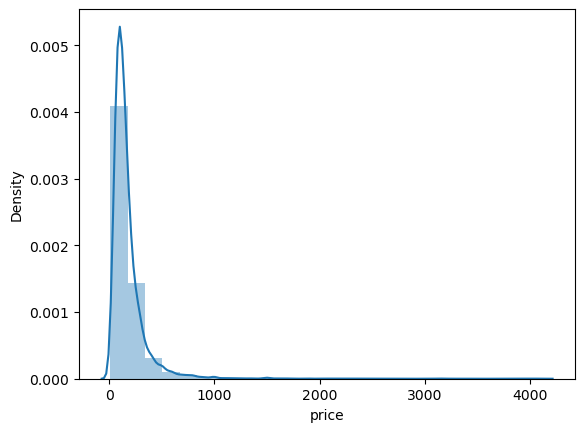

In [11]:
sns.distplot(df_rome_june['price'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

### I have already cleaned the outliers in previous steps, so I assume these extreme values are valid, and I let them be.

In [14]:
df_rome_june['price'].mean()

178.70581269120694

In [15]:
df_rome_june['price'].median()

131.0

# 3. Data prep for regression analysis

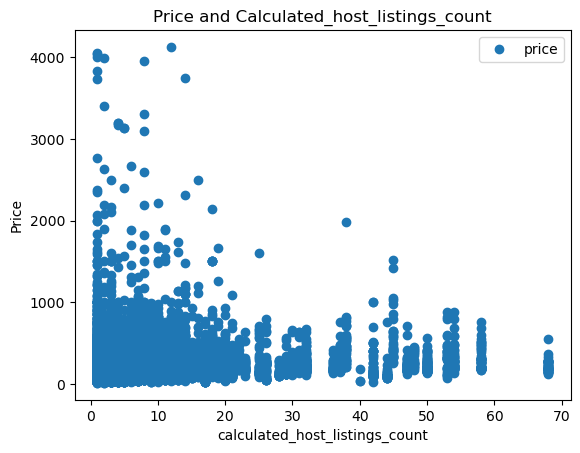

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_rome_june.plot(x = 'calculated_host_listings_count', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price and Calculated_host_listings_count')  
plt.xlabel('calculated_host_listings_count')  
plt.ylabel('Price')  
plt.show()

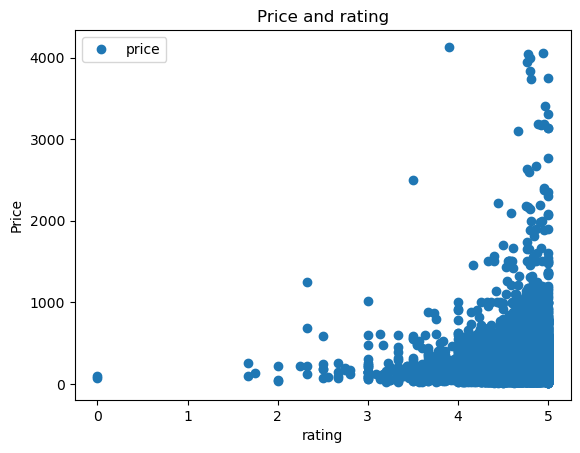

In [18]:
df_rome_june.plot(x = 'rating', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price and rating')  
plt.xlabel('rating')  
plt.ylabel('Price')  
plt.show()

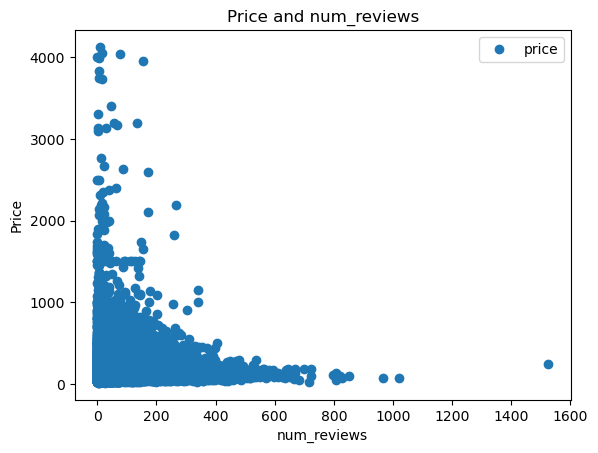

In [19]:
df_rome_june.plot(x = 'num_reviews', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price and num_reviews')  
plt.xlabel('num_reviews')  
plt.ylabel('Price')  
plt.show()

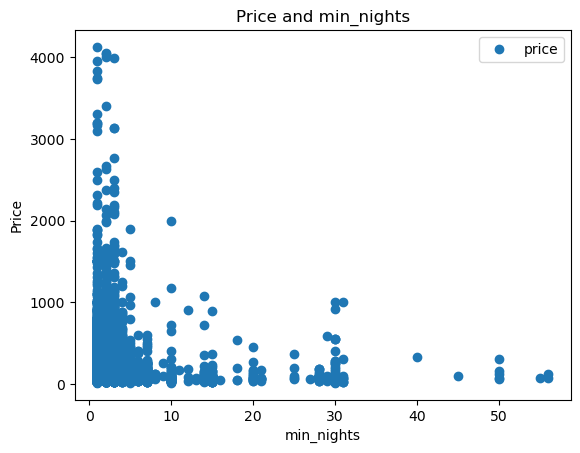

In [20]:
df_rome_june.plot(x = 'min_nights', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price and min_nights')  
plt.xlabel('min_nights')  
plt.ylabel('Price')  
plt.show()

In [28]:
# Reshape the variables for 'Price and rating' into NumPy arrays and put them into separate objects.

X = df_rome_june['num_reviews'].values.reshape(-1,1)
y = df_rome_june['price'].values.reshape(-1,1)

In [29]:
X

array([[  7],
       [147],
       [191],
       ...,
       [  0],
       [  0],
       [  0]])

In [30]:
y

array([[ 50],
       [100],
       [105],
       ...,
       [200],
       [128],
       [376]])

In [34]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4.Regression analysis

In [35]:
# create a regression object
regression = LinearRegression() 
# this is the regression object, which will be fit onto the training set.

In [37]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [38]:
# predict the values of y using x
y_predicted = regression.predict(X_test)

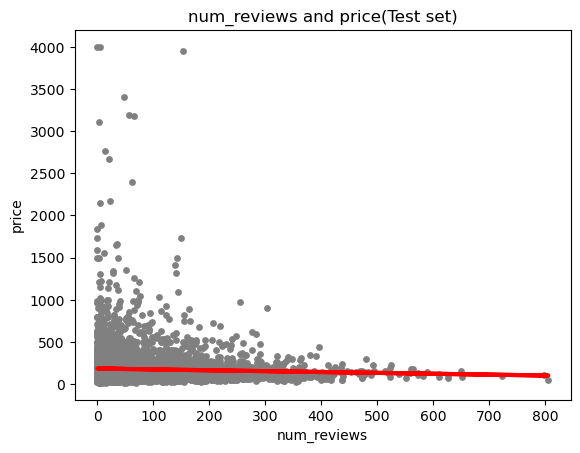

In [39]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('num_reviews and price(Test set)')
plot_test.xlabel('num_reviews')
plot_test.ylabel('price')
plot_test.show()

In [40]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [41]:
# print the model summary statistics and evaluate the performance of the model
print('slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

slope:  [[-0.10301497]]
Mean squared error:  43457.92405597003
R2 score:  0.0011273533752389486


In [42]:
y_predicted

array([[183.3574742 ],
       [154.92534112],
       [183.04842928],
       ...,
       [178.00069551],
       [183.3574742 ],
       [178.92783028]])

In [44]:
# create a data frame comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted':y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,125,183.357474
1,123,154.925341
2,139,183.048429
3,114,183.460489
4,145,183.254459
5,65,183.048429
6,143,183.872549
7,32,180.473055
8,80,182.533354
9,105,180.370040


### compare how the regression fits the training set

In [45]:
# predict X_train
y_predicted_train = regression.predict(X_train)

In [47]:
rmdse= mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [48]:
# print the model summary statistics and evaluate the performance of the model
print('slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

slope:  [[-0.10301497]]
Mean squared error:  43457.92405597003
R2 score:  0.0024075476143908814


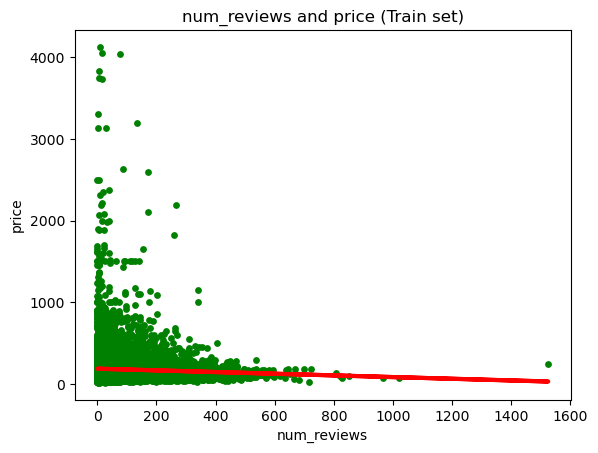

In [49]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('num_reviews and price (Train set)')
plot_test.xlabel('num_reviews')
plot_test.ylabel('price')
plot_test.show()